In [42]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print(tf.__version__)

2.20.0


In [43]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [44]:
#(60000, 28, 28)
x_train.shape

#(10000, 28, 28)
x_test.shape

(10000, 28, 28)

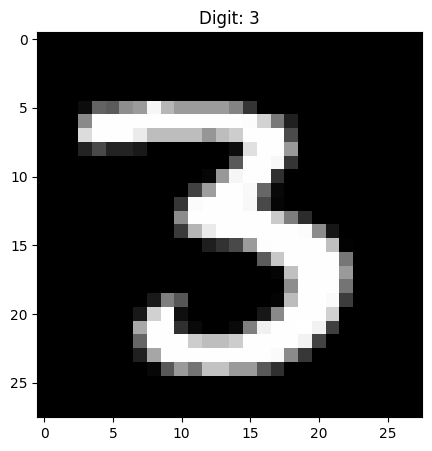

In [45]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[12], cmap='gray')
plt.title(f"Digit: {y_train[12]}")
plt.show()

In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 32, activation='sigmoid'),
    tf.keras.layers.Dense(units = 32, activation='sigmoid'),
    tf.keras.layers.Dense(units = 10, activation='softmax')
])


In [56]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
y_train.shape

(60000,)

In [58]:
# First we have to cimpile our model...

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8190 - loss: 0.7591
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9271 - loss: 0.2589
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9444 - loss: 0.1928
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9537 - loss: 0.1582
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9608 - loss: 0.1368


In [51]:
hist.history

{'accuracy': [0.7545833587646484,
  0.8587499856948853,
  0.8740666508674622,
  0.8772333264350891,
  0.8766000270843506,
  0.8818833231925964,
  0.8907999992370605,
  0.8904833197593689,
  0.892716646194458,
  0.8942333459854126],
 'loss': [0.9489036202430725,
  0.4834693372249603,
  0.4169207811355591,
  0.40609583258628845,
  0.4060022234916687,
  0.38538217544555664,
  0.3597772717475891,
  0.36088547110557556,
  0.35115185379981995,
  0.3450269401073456]}

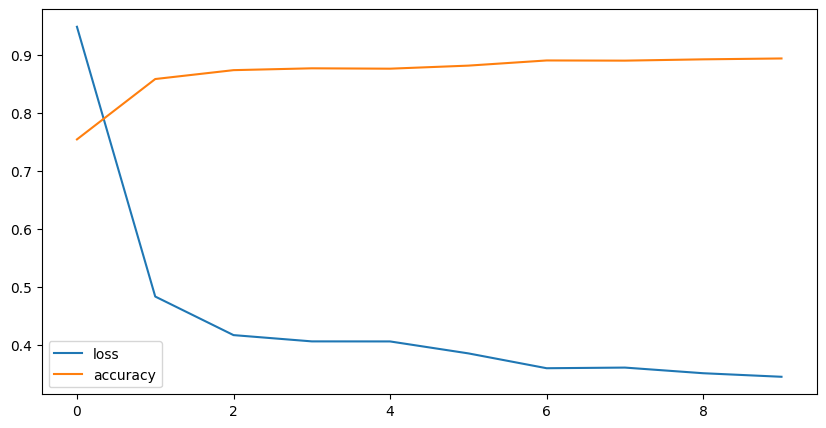

In [52]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['accuracy'], label='accuracy') 
plt.legend()
plt.show()   

In [63]:
#Loss and accuracy 
#model.evaluate(x_test, y_test)

In [ ]:
#SAVING MODEL
#model.save('./digit_net.keras', overwrite=False)

In [62]:
#LOAD MODEL

Loaded_model = tf.keras.models.load_model('./digit_net.keras')
Loaded_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9573 - loss: 0.1453


[0.14532539248466492, 0.9573000073432922]